In [15]:
# Load wine dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input
import matplotlib.pyplot as plt

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

X = df.drop('quality', axis=1).values
y = df['quality'].values


Use the Wine Quality dataset (starting code provided) to predict wine quality score (0–10) using a regression neural network in Keras.



Normalize/Standardize the features


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Use 2 hidden layers (suggested: ReLU)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Regression output (no activation)
])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Compile with mse loss and metrics mae, mse


In [29]:
model.compile(
    optimizer=Adam(),
    loss='mse',
    metrics=['mae', 'mse']
)

Train 30 epochs with a batch size of 32


In [33]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.9573 - mae: 5.3030 - mse: 28.9573 - val_loss: 14.7746 - val_mae: 3.7053 - val_mse: 14.7746
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 11.4192 - mae: 3.1283 - mse: 11.4192 - val_loss: 3.5259 - val_mae: 1.5501 - val_mse: 3.5259
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.6703 - mae: 1.5076 - mse: 3.6703 - val_loss: 2.4938 - val_mae: 1.2721 - val_mse: 2.4938
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 2.3338 - mae: 1.1906 - mse: 2.3338 - val_loss: 2.1558 - val_mae: 1.1784 - val_mse: 2.1558
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 1.9463 - mae: 1.1005 - mse: 1.9463 - val_loss: 1.9237 - val_mae: 1.1099 - val_mse: 1.9237
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 1.7733 - mae: 1.0499 - mse: 1.7733 - val_loss: 1.7541 - val_mae: 1.0532 - val_mse: 1.7541
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 1.5532 - mae: 0.9656 - mse: 1.5532 - v

Plot train vs val MAE


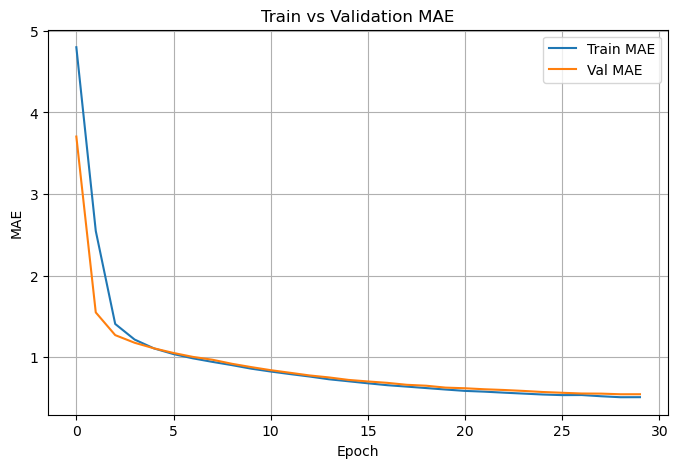

In [36]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title("Train vs Validation MAE")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.grid(True)
plt.show()

Report final test MAE

In [39]:
test_loss, test_mae, test_mse = model.evaluate(X_test, y_test, verbose=0)
print(f"📊 Final Test MAE: {test_mae:.3f}")

📊 Final Test MAE: 0.550
